 # Exercise 1: Solving a 2D motion planning problem by PRM
 http://www.osrobotics.org/osr/planning/path_planning.html

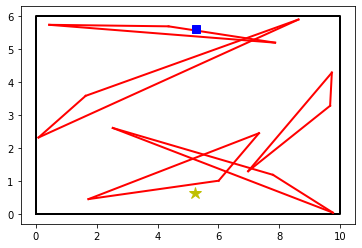

In [1]:
#inporting environment
import numpy as np
import pylab as pl
import sys
sys.path.append('osr_examples/scripts/')
import environment_2d
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
env.plot()
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)

In [2]:
#sample space for recording nodes
samplex = []
sampley = []
sample = []

#distance betweem point
r = 0.5

#current location
currentx = None
currenty = None

sample.append((x_start, y_start))
sample.append((x_goal, y_goal))


In [3]:
from math import dist
#generate random node across the map
nodeNum = 500
num = 0
while (num<nodeNum):
    tempx = 10*np.random.rand()
    tempy = 6*np.random.rand()
    if env.check_collision(tempx, tempy) == False and (tempx, tempy) not in sample: #make sure no repeat nodes
        num += 1
        samplex.append(tempx)
        sampley.append(tempy)
        sample.append((tempx, tempy))

#createlist for next visit and put start point as first visit node
nextvisit = [(x_start, y_start)]

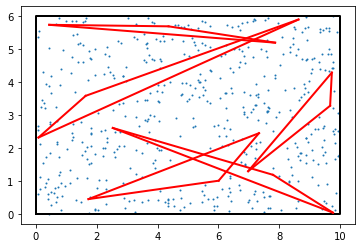

In [4]:
#view generated nodes on plot
import matplotlib.pyplot as plt

plt.scatter(samplex, sampley, s=1)
env.plot()

In [5]:
#make a sample space copy 
sampletemp = sample

#create parentnode list for tracking
parentsOf={}

loops = 0 #for monitor loop

while(len(nextvisit)!=0 and (currentx, currenty) != (x_goal, y_goal)):
    
    currentx, currenty = nextvisit[0]
    nextvisit.pop(0)
    sampletemp.remove((currentx, currenty)) #remove visited node from sample
    
    if(dist((x_goal, y_goal), (currentx, currenty)) < r): #if goal is reachable from current postiion, reach it and break
        parentsOf[(x_goal, y_goal)] = (currentx, currenty)
        (currentx, currenty) = (x_goal, y_goal)
        break
    
    for tempx, tempy in sampletemp: #mark every node within r and not visited as nextvisit
        thisnode = (tempx, tempy)
        if dist((tempx, tempy), (currentx, currenty)) < r and thisnode not in nextvisit:
            parentsOf[(tempx, tempy)] = (currentx, currenty)
            nextvisit.append(thisnode)
    
    loops += 1
    if(loops % 100 == 0):
        print(loops)

if(len(nextvisit) == 0 and (currentx, currenty) != (x_goal, y_goal)): # if goal not reachable 
    print("There is no way")
elif((currentx, currenty) == (x_goal, y_goal)): # if reached goal
    print("Congrats!")

100
200
300
There is no way


In [6]:
#check state
print(x_start, y_start)
print (currentx, currenty)
print(x_goal, y_goal)

5.279088234179204 5.625429503705652
0.435819177939476 0.005440021291734043
5.21696122444958 0.6491602973233841


In [7]:
#create route for visual
routex = []
routey = []

#start from goal and backtrack to start with parentsnode list
tempx = x_goal
tempy = y_goal
print(parentsOf[(tempx, tempy)]) 
while((tempx, tempy) != (x_start, y_start)):
    routex.append(tempx)
    routey.append(tempy)
    (tempx, tempy) = parentsOf[(tempx, tempy)]
routex.append(tempx)
routey.append(tempy)

plt.plot(routex, routey)
env.plot()

KeyError: (5.21696122444958, 0.6491602973233841)

# Exercise 2: Post-processing a 2D path
https://osrobotics.org/osr/planning/post_processing.html 

The node decreased from 147 to 7
The distance dereased from 14.600000000000001 to 12.91705270891858


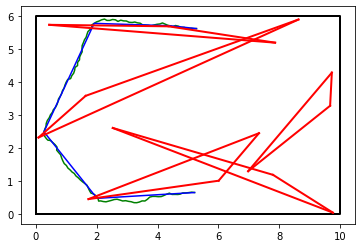

In [ ]:
#make a copy of parentsnode
improvedParentsOf = parentsOf
testroute = list(zip(routex, routey))
#print(len(testroute))

impRouteX = []
impRouteY = []

impRouteX.append(x_goal)
impRouteY.append(y_goal)

x = x_goal #also start from goal of route
y = y_goal
idx = 0
while((x,y) != (x_start, y_start)):
    if(idx == len(testroute) - 1):
        break
    #print(idx)
    
    stp = 1
    collision = 0
    while collision == 0:
        for n in range(0, np.floor(dist(testroute[idx+stp], (x, y))/r).astype(np.int64)):
            #print(n)
            testx = (testroute[idx+stp][0] - x) * r / dist(testroute[idx+stp], (x, y)) * n + x #segment the line to line segments of length r and check each points 
            testy = (testroute[idx+stp][1] - y) * r / dist(testroute[idx+stp], (x, y)) * n + y
            if(env.check_collision(testx,testy)):
                collision = 1
                break
        if collision == 0: #if no collision update parentnode
            improvedParentsOf[(x,y)] = testroute[idx+stp]
            if(idx+stp >= len(testroute)-1): #if reached last node, append improved route with current node and end the loop
                idx = idx+stp
                x, y = testroute[idx]
                impRouteX.append(x)
                impRouteY.append(y)
                break
            stp += 1 #if not reached last node, go to next node
        elif(collision == 1): #if collision occurs, append improved route with last node
            #print("change = " + str(idx) + " " + str(stp))
            idx = idx + stp - 1
            x, y = testroute[idx]
            impRouteX.append(x)
            impRouteY.append(y)

#calculate distance
impDistance = 0
impRoute = list(zip(impRouteX, impRouteY))
index = 0
while(index < len(impRoute)-1):
    impDistance += dist(impRoute[index], impRoute[index+1])
    index += 1

print("The node decreased from " + str(len(routex)) + " to " + str(len(impRouteX)))
print("The distance dereased from " + str((len(routex)-1)*0.1) + " to " + str(impDistance))
plt.plot(routex, routey, color = "green")
plt.plot(impRouteX, impRouteY, color = "blue")
env.plot()

In [ ]:
rdist = [0.5, 0.1, 0.05, 0.01]
nodeNums = []

def visOfMap(r):
    #sample space for recording nodes
    samplex = []
    sampley = []
    sample = []

    #current location
    currentx = None
    currenty = None

    sample.append((x_start, y_start))
    sample.append((x_goal, y_goal))

    #generate random node across the map
    nodeNum = 55000
    num = 0
    while (num<nodeNum):
        tempx = 10*np.random.rand()
        tempy = 6*np.random.rand()
        if env.check_collision(tempx, tempy) == False and (tempx, tempy) not in sample: #make sure no repeat nodes
            num += 1
            samplex.append(tempx)
            sampley.append(tempy)
            sample.append((tempx, tempy))

    #createlist for next visit and put start point as first visit node
    nextvisit = [(x_start, y_start)]